### Project  Movie Prophet
#### A project to create a predictive model to forecast a movie's performance on the Box Office
#### Team Members - Nelson Dsouza, Maria George, Saurabh Seth

##### movies_final.csv contains the final csv file for modelling

In [48]:
# GET THE LATEST CSV HERE
import pandas as pd
movie_df = pd.read_csv("movies_final.csv")
print(movie_df.shape)
movie_df.head(3)

#movie_df[movie_df['title'] == '10']

(6773, 16)


,key_bom,key_wiki,key_omdb,title,year,budget,gross,revenue,release_date,release_month,release_quarter,release_day_of_the_year,release_week_of_the_year,holiday_season,runtime,mpaa_rating
0,b13998,w25445,NaN,the mod squad,1999,50000000,15415361.0,-0.691693,1999-03-26 00:00:00,3,1,85,12,0,92,4
1,b7039,w21140,o6452,kundun,1997,28,5.7,-0.796429,1997-12-25 00:00:00,12,4,359,51,1,134,3
2,b14953,w40276,o20779,the usual suspects,1995,6000000,34400000.0,4.733333,1995-08-18 00:00:00,8,3,230,33,0,106,4


In [31]:
movie_df[movie_df['revenue'].isnull()]

,key_bom,key_wiki,key_omdb,title,year,budget,gross,revenue,release_date,release_month,release_quarter,release_day_of_the_year,release_week_of_the_year


In [ ]:
movie_df[movie_df['revenue']==0]

### Common

In [297]:
# Load libraries and instatiate DB connection

%matplotlib inline
import pandas as pd
import pymysql
import numpy as np
import time
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.max_seq_items = 2000

In [327]:
# Connect to the database
connection = pymysql.connect(host='localhost', user='root', password='mprophet', db='movies')

# Pull table from database
cur = connection.cursor()

cur.execute("select * FROM bom")
bom_sql = []
for row in cur: bom_sql.append(list(row))

cur.execute("select * FROM wiki")
wiki_sql = []
for row in cur: wiki_sql.append(list(row))
    
cur.execute("select * FROM omdb")
omdb_sql = []
for row in cur: omdb_sql.append(list(row))
    
cur.execute("select * FROM comb_index")
comb_sql = []
for row in cur: comb_sql.append(list(row))
    
cur.execute("select * FROM movies_final")
movie_sql = []
for row in cur: movie_sql.append(list(row))
    
cur.close()
connection.close()

In [3]:
# Store bom table information in DataFrame

bom_columns =         ['bom_title', 'bom_link', 'key_bom', 'bom_date', 'bom_year', 'bom_name', 'bom_budget',
                       'bom_domestic_gross', 'bom_lifetime_gross', 'bom_release_date', 'bom_runtime', 'bom_distributor',
                       'bom_genre', 'bom_rating', 'bom_awards', 'bom_actor', 'bom_assoc_producer', 'bom_cinematographer',
                       'bom_composer', 'bom_director', 'bom_exec_producer', 'bom_line_producer', 'bom_players', 'bom_producer',
                       'bom_writer', 'bom_close_date', 'bom_domestic_summary', 'bom_in_release', 'bom_limited_opening_weekend',
                       'bom_opening_weekend', 'bom_wide_opening_weekend', 'bom_widest_release', 'bom_domestic_revenue',
                       'bom_foreign_revenue', 'bom_worldwide_revenue', 'bom_total_lifetime_gross']

bom = pd.DataFrame(bom_sql, columns=bom_columns)
#bom.to_csv('bom.csv')
print('Total movies from Box Office Mojo:', len(bom))
bom.head(1)

Total movies from Box Office Mojo: 16826


,bom_title,bom_link,key_bom,bom_date,bom_year,bom_name,bom_budget,bom_domestic_gross,bom_lifetime_gross,bom_release_date,bom_runtime,bom_distributor,bom_genre,bom_rating,bom_awards,bom_actor,bom_assoc_producer,bom_cinematographer,bom_composer,bom_director,bom_exec_producer,bom_line_producer,bom_players,bom_producer,bom_writer,bom_close_date,bom_domestic_summary,bom_in_release,bom_limited_opening_weekend,bom_opening_weekend,bom_wide_opening_weekend,bom_widest_release,bom_domestic_revenue,bom_foreign_revenue,bom_worldwide_revenue,bom_total_lifetime_gross
0,#horror,http://www.boxofficemojo.com/movies/?id=horrorifc.htm,b0,20-Nov-15,2015\r,#Horror,N/A,,,20-Nov-15,1 hrs. 30 min.,IFC,Horror,Unknown,No Academy Awards Information\r,"""['Balthazar Getty', 'Timothy Hutton', 'Natasha Lyonne', 'Taryn Manning', 'Chloe Sevigny']""",,,,,,,,,\r,,No Domestic Summary Information,,,,,\r,,,,No Total Lifetime Gross Information\r


In [4]:
wiki_columns = ['wiki_budget',
                "wiki_cinematography","wiki_director","wiki_distributor", 
                "wiki_editing", "wiki_gross" , "wiki_music", 
                "wiki_pageid", "wiki_producer", "wiki_released", 
                "wiki_runtime", "wiki_screenplay", "wiki_starring", 
                "wiki_studio","wiki_title", "key_wiki", "year_wiki",
                "year_wiki_format"];

wiki = pd.DataFrame(wiki_sql, columns=wiki_columns)
#bom.to_csv('bom.csv')
print('Total movies from Wikipedia:', len(wiki))

wiki['key_wiki'] = [str(v).lstrip() for v in wiki['key_wiki']]
wiki['key_wiki']= [str(v).rstrip() for v in wiki['key_wiki']]

wiki.head(1)

Total movies from Wikipedia: 40981


,wiki_budget,wiki_cinematography,wiki_director,wiki_distributor,wiki_editing,wiki_gross,wiki_music,wiki_pageid,wiki_producer,wiki_released,wiki_runtime,wiki_screenplay,wiki_starring,wiki_studio,wiki_title,key_wiki,year_wiki,year_wiki_format
0,,"""[Gilbert Salas, Heather Rae]""",[Heather Rae],[],"""[Gregory Bayne, Heather Rae]""",,[John Trudell & Bad Dog],5975700,"""[Heather Rae, Elyse Katz]""","""[2005, 01, 20, Sundance Film Festival, 2006, 02, 24, United States]""",[80 minutes],,[],,trudell,w39443,None,None


In [5]:
omdb_columns = ["omdb_movie_id", "omdb_movie_year", "omdb_title", "omdb_rated", "omdb_response", 
                 "omdb_language" , "omdb_country", "omdb_metascore", "omdb_imdbrating", "omdb_released",
                 "omdb_runtime", "omdb_type", "omdb_poster", "omdb_imdbvotes", "omdb_awards", "omdb_genres",
                 "omdb_actors", "omdb_directors","omdb_writers","omdb_plot","key_omdb"]

omdb = pd.DataFrame(omdb_sql, columns=omdb_columns)
#bom.to_csv('bom.csv')
print('Total movies from Omdb:', len(omdb))

omdb.head(1)

Total movies from Omdb: 23254


,omdb_movie_id,omdb_movie_year,omdb_title,omdb_rated,omdb_response,omdb_language,omdb_country,omdb_metascore,omdb_imdbrating,omdb_released,omdb_runtime,omdb_type,omdb_poster,omdb_imdbvotes,omdb_awards,omdb_genres,omdb_actors,omdb_directors,omdb_writers,omdb_plot,key_omdb
0,1,1933,A Bedtime Story,N/A,None,"English, French",USA,N/A,None,22 Apr 1933,87 min,movie,https://images-na.ssl-images-amazon.com/images/M/MV5BODhjZWY3ZjQtN2RjNy00ZTE4LTgzMmQtYmEyMzc0N2M...,None,N/A,Musical|Romance|Comedy,Maurice Chevalier|Helen Twelvetrees|Edward Everett Horton|Adrienne Ames,Norman Taurog,Roy Horniman (novel)|Benjamin Glazer (adaptation)|Nunnally Johnson (screenplay)|Waldemar Young (...,Parisian playboy plays father to an abandoned baby who interferes with his womanizing.,o0


In [6]:
comb_columns = ["key_bom","key_wiki","key_omdb","bom_title","wiki_title","omdb_title","year_bom",
               "year_bom_format","year_wiki", "year_wiki_format", "year_omdb", "year_omdb_format","score"]
comb_index = pd.DataFrame(comb_sql, columns=comb_columns)
#bom.to_csv('bom.csv')
print('Total movies in combined file:', len(comb_index))
comb_index.head()

Total movies in combined file: 24665


,key_bom,key_wiki,key_omdb,bom_title,wiki_title,omdb_title,year_bom,year_bom_format,year_wiki,year_wiki_format,year_omdb,year_omdb_format,score
0,b15584,w39443,o18495,trudell,trudell,trudell,3-Feb-06,2006,2005,2005,20-Jan-05,2005,1\r
1,b14216,w28904,o12944,the party at kitty and stud's,the party at kitty and stud's,the party at kitty and stud's,6-Jul-76,1976,1970,1970,10-Feb-70,1970,1\r
2,,w4957,o17832,,borrowed wives,borrowed wives,,,20-Aug,20-Aug,20-Aug-30,1930,1\r
3,,w40302,o15689,,the vagabond trail,the vagabond trail,,,9-Mar,9-Mar,9-Mar-24,1924,1\r
4,,w11443,o9690,,eddie's million dollar cook-off,eddie's million dollar cook-off,,,2003,2003,18-Jul-03,2003,1\r


In [7]:
movie_columns = ["key_bom","key_wiki","key_omdb","bom_title","wiki_title","omdb_title",
                                  "year_bom_format","year_wiki_format","year_omdb_format",
                                "wiki_budget","wiki_gross","bom_budget","bom_domestic_gross"]
movie_df = pd.DataFrame(movie_sql, columns=movie_columns)
#bom.to_csv('bom.csv')
print('Total movies in combined file:', len(movie_df))
movie_df.head()

Total movies in combined file: 8067


,key_bom,key_wiki,key_omdb,bom_title,wiki_title,omdb_title,year_bom_format,year_wiki_format,year_omdb_format,wiki_budget,wiki_gross,bom_budget,bom_domestic_gross
0,b13998,w25445,,the mod squad,the mod squad,,1999,1999,,[$50 million],"""""""[$15,415,361]""""""",$50 million,13263993
1,b7039,w21140,o6452,kundun,kundun,kundun,1997,1997,1997,[$28],[$5.7],$28 million,5684789
2,b14953,w40276,o20779,the usual suspects,the usual suspects,the usual suspects,1995,1995,1995,[$6 million],[$34.4 million],$6 million,23341568
3,b9328,w28365,o5434,ouija: origin of evil,ouija: origin of evil,ouija: origin of evil,2016,2016,2016,[$9 million],[$81.7 million],$9 million,35144505
4,b10189,w31185,,red dawn (2012),red dawn (2012 film),,2012,2012,,[$65 million],[$48.1 million],$65 million,44806783


### Nelson

In [611]:
# Loading finalized table
movies_f = pd.read_csv("movies_final_v1.csv")

# Create a score for awards and add it to the table
award_win_factor = 5
bom_awa = bom[~bom['bom_awards'].str.contains('No Academy Awards Information')][['key_bom','bom_title', 'bom_awards']].copy()
bom_awa['bom_awards_num'] = bom_awa['bom_awards'].str.replace('\r','')
bom_awa['bom_awards_num'] = bom_awa['bom_awards_num'].str.replace('Nominated for ','')
bom_awa['bom_awards_num'] = bom_awa['bom_awards_num'].str.replace(' Oscars','')
bom_awa['bom_awards_num'] = bom_awa['bom_awards_num'].str.replace(' Oscar','')
bom_awa['bom_awards_num'] = bom_awa['bom_awards_num'].str.replace(', Including','')
bom_awa['bom_awards_num'] = bom_awa['bom_awards_num'].str.replace(' Win.','')
bom_awa['bom_awards_num'] = bom_awa['bom_awards_num'].str.replace('.','')
bom_awa['bom_awards_num'] = bom_awa['bom_awards_num'].str.replace('"','')

alpha_to_num = {'One':1, 'Two':2, 'Three':3, 'Four':4, 'Five':5, 'Six':6, 'Seven':7, 'Eight':8, 'Nine':9, 
                'Ten':10, 'Eleven':11, 'Twelve':12, 'Thirteen':13, 'Fourteen':14}
bom_awa['bom_awards_num'] = bom_awa['bom_awards_num'].apply(lambda x: x.split(' '))
bom_awa['bom_awards_num'] = bom_awa['bom_awards_num'].apply(lambda x: [alpha_to_num[val] for val in x ])
bom_awa['bom_awards_scr'] = bom_awa['bom_awards_num'].apply(lambda x: x[0]+x[1]*award_win_factor if len(x)>1 else x[0] )

movies_f = pd.merge(movies_f,bom_awa[['key_bom', 'bom_awards', 'bom_awards_scr']],on = "key_bom",how="left")
movies_f['bom_awards_scr'].fillna(0, inplace=True)

print('Shape of finalized table', movies_f.shape)
print('Movies with no BoM information:', len(bom_ftr[bom_ftr['actor'].isnull()]))
print('Movies with no player information:', len(movies_f[movies_f['key_bom'].isnull()]))
movies_f.head(1)

Shape of finalized table (6773, 28)
Movies with no BoM information: 2802
Movies with no player information: 2563


,index,key_bom,key_wiki,key_omdb,title,year,budget,gross,revenue,release_date,release_month,release_quarter,release_day_of_the_year,release_week_of_the_year,holiday_season,runtime,mpaa_rating,wiki_editing,wiki_studio,actor,director,writer,distributor,composer,cinematographer,producer,bom_awards,bom_awards_scr
0,0,b27,w123,NaN,"""""""10,000 bc """"""",2008,105000000,269800000,1.569524,2008-03-07 00:00:00,3,1,67,9,0,109,3,[Alexander Berner],"""[Legendary Pictures, Centropolis Entertainment]""","""['Steven Strait', 'Camilla Belle']""",['Roland Emmerich'],"""['Roland Emmerich', 'Harald Kloser']""",Warner Bros.,"""['Harald Kloser', 'Thomas Wander']""",[Ueli Steiger],"""['Mark Gordon', 'Harald Kloser', 'Scott Mednick', 'Thomas Tull']""",NaN,0


In [612]:
def clean_people(movie_data, ind, peeps):
    """
    Function to clean people associated with movies
    """
    peeps_clean = peeps+'_clean'
    bom_ftr = movie_data[[ind, peeps]].copy()
    bom_ftr[peeps_clean] = bom_ftr[peeps].str.replace('[','')
    bom_ftr[peeps_clean] = bom_ftr[peeps_clean].str.replace(']','')
    bom_ftr[peeps_clean] = bom_ftr[peeps_clean].str.replace('"','')
    bom_ftr[peeps_clean] = bom_ftr[peeps_clean].str.replace("'",'')
    bom_ftr[peeps_clean] = bom_ftr[peeps_clean].str.replace("*",'')
    bom_ftr[peeps_clean] = bom_ftr[peeps_clean].str.replace("|",',')
    bom_ftr[peeps_clean] = bom_ftr[peeps_clean].str.replace(", ",',')
    bom_ftr[peeps_clean] = bom_ftr[peeps_clean].replace(np.nan, '', regex=True)
    bom_ftr[peeps_clean] = bom_ftr[peeps_clean].apply(lambda x: x.split(','))
    print('Cleaned', peeps)
    clean_movie_data = pd.merge(movie_data, bom_ftr[[ind, peeps_clean]], on = "index")
    return clean_movie_data

In [613]:
movies_f = clean_people(movies_f, 'index', 'actor')
movies_f = clean_people(movies_f, 'index', 'director')
movies_f = clean_people(movies_f, 'index', 'writer')
movies_f = clean_people(movies_f, 'index', 'distributor')
movies_f = clean_people(movies_f, 'index', 'composer')
movies_f = clean_people(movies_f, 'index', 'cinematographer')
movies_f = clean_people(movies_f, 'index', 'producer')

Cleaned actor
Cleaned director
Cleaned writer
Cleaned distributor
Cleaned composer
Cleaned cinematographer
Cleaned producer


In [614]:
print(movies_f.shape)
movies_f[movies_f['title'].str.contains('slave')]

(6773, 35)


,index,key_bom,key_wiki,key_omdb,title,year,budget,gross,revenue,release_date,release_month,release_quarter,release_day_of_the_year,release_week_of_the_year,holiday_season,runtime,mpaa_rating,wiki_editing,wiki_studio,actor,director,writer,distributor,composer,cinematographer,producer,bom_awards,bom_awards_scr,actor_clean,director_clean,writer_clean,distributor_clean,composer_clean,cinematographer_clean,producer_clean
121,121,b48,w147,NaN,12 years a slave,2013,17100000,187700000,9.976608,2013-10-18 00:00:00,10,4,291,41,1,134,4,[Joe Walker],NaN,"""['Chiwetel Ejiofor', 'Michael Fassbender', 'Brad Pitt', 'Benedict Cumberbatch', 'Paul Dano', 'S...",[],['John Ridley'],Fox Searchlight,['Hans Zimmer'],[Sean Bobbitt],"""['Dede Gardner', 'Jeremy Kleiner', 'Arnon Milchan', 'Brad Pitt', 'John Ridley']""","""Nominated for Nine Oscars, Including Three Wins.""\r",24,"[Chiwetel Ejiofor, Michael Fassbender, Brad Pitt, Benedict Cumberbatch, Paul Dano, Sarah Paulson...",[],[John Ridley],[Fox Searchlight],[Hans Zimmer],[Sean Bobbitt],"[Dede Gardner, Jeremy Kleiner, Arnon Milchan, Brad Pitt, John Ridley]"


In [615]:
def people_score(movie_data, peeps, rev, awa):
    """
    Getting unique actors
    """
    start_time = time.time()
    peep_unq = list(movie_data[peeps])
    peep_unq = list(set(sum(peep_unq, [])))
    peep_unq = [e for e in peep_unq if e not in ('', ' ')]
    peep_cnt = dict((ky,0) for ky in peep_unq)
    peep_awa = dict((ky,0) for ky in peep_unq)
    peep_acn = dict((ky,0) for ky in peep_unq)
    peep_unq = dict((ky,0) for ky in peep_unq)
    print('Unique', peeps, ': ', len(peep_unq))

    # For each actor, assigning score based on revenue of their movie
    mov_peeps = list(movie_data[peeps])
    mov_peeps = [[actor for actor in mov if actor not in ('', ' ')] for mov in mov_peeps]
    ind = 0
    for actors in mov_peeps:
        for actor in actors:
            peep_unq[actor] += float(movie_data.loc[ind, [rev]])
            peep_cnt[actor] += 1
            peep_awa[actor] += int(movie_data.loc[ind, [awa]])
            if int(movie_data.loc[ind, [awa]]) != 0: peep_acn[actor] += 1
        ind+=1
    print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds\n")
    return (peep_unq, peep_cnt, peep_awa, peep_acn)

In [616]:
# Storing people scores
unq_dir, cnt_dir, awa_dir, acn_dir = people_score(movies_f, 'director_clean', 'revenue', 'bom_awards_scr')
unq_act, cnt_act, awa_act, acn_act = people_score(movies_f, 'actor_clean', 'revenue', 'bom_awards_scr')
unq_wri, cnt_wri, awa_wri, acn_wri = people_score(movies_f, 'writer_clean', 'revenue', 'bom_awards_scr')
unq_dis, cnt_dis, awa_dis, acn_dis = people_score(movies_f, 'distributor_clean', 'revenue', 'bom_awards_scr')
unq_com, cnt_com, awa_com, acn_com = people_score(movies_f, 'composer_clean', 'revenue', 'bom_awards_scr')
unq_cin, cnt_cin, awa_cin, acn_cin = people_score(movies_f, 'cinematographer_clean', 'revenue', 'bom_awards_scr')
unq_pro, cnt_pro, awa_pro, acn_pro = people_score(movies_f, 'producer_clean', 'revenue', 'bom_awards_scr')

Unique director_clean :  1642
Time taken: 7.98 seconds

Unique actor_clean :  4341
Time taken: 35.74 seconds

Unique writer_clean :  1260
Time taken: 6.22 seconds

Unique distributor_clean :  214
Time taken: 8.98 seconds

Unique composer_clean :  1430
Time taken: 9.9 seconds

Unique cinematographer_clean :  1245
Time taken: 8.89 seconds

Unique producer_clean :  3331
Time taken: 18.79 seconds



In [617]:
def mean_awards(awa, acn):
    """
    Getting mean of awards
    """
    awa_mea = {}
    for k in awa.keys():
        if awa[k] != 0:
            awa_mea[k] = awa[k]/acn[k]
        else:
            awa_mea[k] = awa[k]
    return awa_mea

In [629]:
# Storing mean of awards in variable
awa_mea_act = mean_awards(awa_act, acn_act)
awa_mea_dir = mean_awards(awa_dir, acn_dir)
awa_mea_wri = mean_awards(awa_wri, acn_wri)
awa_mea_dis = mean_awards(awa_dis, acn_dis)
awa_mea_com = mean_awards(awa_com, acn_com)
awa_mea_cin = mean_awards(awa_cin, acn_cin)
awa_mea_pro = mean_awards(awa_pro, acn_pro)

In [628]:
# Normalizing award mean
#from sklearn import preprocessing
#min_max_scaler = preprocessing.MinMaxScaler()
#a['revenue_norm'] = min_max_scaler.fit_transform(a['revenue'])

In [630]:
# Calculating the mean of the score for the people
mean_act = {k: (unq_act[k]/cnt_act[k])+(awa_mea_act[k]) for k in unq_act.keys()}
mean_dir = {k: (unq_dir[k]/cnt_dir[k])+(awa_mea_dir[k]) for k in unq_dir.keys()}
mean_wri = {k: (unq_wri[k]/cnt_wri[k])+(awa_mea_wri[k]) for k in unq_wri.keys()}
mean_dis = {k: (unq_dis[k]/cnt_dis[k])+(awa_mea_dis[k]) for k in unq_dis.keys()}
mean_com = {k: (unq_com[k]/cnt_com[k])+(awa_mea_com[k]) for k in unq_com.keys()}
mean_cin = {k: (unq_cin[k]/cnt_cin[k])+(awa_mea_cin[k]) for k in unq_cin.keys()}
mean_pro = {k: (unq_pro[k]/cnt_pro[k])+(awa_mea_pro[k]) for k in unq_pro.keys()}

In [631]:
actor='Meryl Streep'
dirtr = 'Christopher Nolan'
print(unq_act[actor], cnt_act[actor], awa_act[actor], acn_act[actor], awa_mea_act[actor], mean_act[actor])
print(unq_dir[dirtr], cnt_dir[dirtr], awa_dir[dirtr], acn_dir[dirtr], awa_mea_dir[dirtr], mean_dir[dirtr])

73.04406964939649 35 173 20 8.65 10.736973418554186
8.488056823618585 6 59 5 11.8 13.214676137269764


In [ ]:
'''
# Pull the actor feature into dataframe and calculate stats

f_actor = pd.Series(actor_unq, name='score').to_frame()
f_actor = f_actor.sort_values(by='score', ascending=False)
f_actor.reset_index(inplace=True)
f_actor.columns=['Actors', 'score']

print(f_actor.describe().transpose())
print(f_actor.head(5))

# Analyzing distribution

plt.figure(1, figsize = (15,6))
plt.hist(list(f_actor[f_actor['score'] != 0]['score']), range=[0,30], bins=(30), facecolor='purple')
plt.title("Distribution of Actor Scores", fontsize = 22)
plt.ylabel("Score", fontsize = 15)
plt.xlabel("Number of Actors", fontsize=15)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

plt.savefig('Actor_Distribution.png')
'''

In [633]:
def movie_people_score(movie_data, peeps, peeps_score):
    """
    For each movie, assigning player score
    """
    mov_peeps = list(movie_data[peeps])
    mov_peeps = [[actor for actor in mov if actor not in ('', ' ')] for mov in mov_peeps]
    ind = 0
    mov_score = []
    for actors in mov_peeps:
        agg_actor_score = 0
        for actor in actors:
            agg_actor_score += peeps_score[actor]
        mov_score.append(agg_actor_score)
        ind+=1
    return mov_score

In [634]:
# Creating new columns for player scores
movies_f["actor_score"] = movie_people_score(movies_f, 'actor_clean', mean_act)
movies_f["director_score"] = movie_people_score(movies_f, 'director_clean', mean_dir)
movies_f["writer_score"] = movie_people_score(movies_f, 'writer_clean', mean_wri)
movies_f["distributor_score"] = movie_people_score(movies_f, 'distributor_clean', mean_dis)
movies_f["composer_score"] = movie_people_score(movies_f, 'composer_clean', mean_com)
movies_f["cinematographer_score"] = movie_people_score(movies_f, 'cinematographer_clean', mean_cin)
movies_f["producer_score"] = movie_people_score(movies_f, 'producer_clean', mean_pro)

In [635]:
movies_f.to_csv("movies_final_v2.csv",index=None)
print(movies_f.shape)
movies_f.head(1)

(6773, 42)


,index,key_bom,key_wiki,key_omdb,title,year,budget,gross,revenue,release_date,release_month,release_quarter,release_day_of_the_year,release_week_of_the_year,holiday_season,runtime,mpaa_rating,wiki_editing,wiki_studio,actor,director,writer,distributor,composer,cinematographer,producer,bom_awards,bom_awards_scr,actor_clean,director_clean,writer_clean,distributor_clean,composer_clean,cinematographer_clean,producer_clean,actor_score,director_score,writer_score,distributor_score,composer_score,cinematographer_score,producer_score
0,0,b27,w123,NaN,"""""""10,000 bc """"""",2008,105000000,269800000,1.569524,2008-03-07 00:00:00,3,1,67,9,0,109,3,[Alexander Berner],"""[Legendary Pictures, Centropolis Entertainment]""","""['Steven Strait', 'Camilla Belle']""",['Roland Emmerich'],"""['Roland Emmerich', 'Harald Kloser']""",Warner Bros.,"""['Harald Kloser', 'Thomas Wander']""",[Ueli Steiger],"""['Mark Gordon', 'Harald Kloser', 'Scott Mednick', 'Thomas Tull']""",NaN,0,"[Steven Strait, Camilla Belle]",[Roland Emmerich],"[Roland Emmerich, Harald Kloser]",[Warner Bros.],"[Harald Kloser, Thomas Wander]",[Ueli Steiger],"[Mark Gordon, Harald Kloser, Scott Mednick, Thomas Tull]",1.397698,8.819881,3.139048,34236.538092,3.18727,2.845798,37.177331


In [636]:
# Entering scores into database
def insert_scores_db(tab, peeps_scores):
    vals = ''
    for key, value in peeps_scores.items(): vals += "('" + key + "'," + str(value) + '), '
    vals = vals[:-2]

    connection = pymysql.connect(host='localhost', user='root', password='mprophet', db='movies')
    cur = connection.cursor()
    cur.execute("drop table if exists %s;" %(tab))
    cur.execute("create table %s(name varchar(100), score float);" %(tab))
    cur.execute("INSERT INTO %s (name, score) VALUES %s;" %(tab, vals))
    cur.execute('commit;')
    print('Inserted', len(peeps_scores), 'values into table:', tab)
    cur.close()
    connection.close()

In [637]:
insert_scores_db('scores_act', unq_act)
insert_scores_db('scores_dir', unq_dir)
insert_scores_db('scores_wri', unq_wri)
insert_scores_db('scores_dis', unq_dis)
insert_scores_db('scores_com', unq_com)
insert_scores_db('scores_cin', unq_cin)
insert_scores_db('scores_pro', unq_pro)

Inserted 4341 values into table: scores_act
Inserted 1642 values into table: scores_dir
Inserted 1260 values into table: scores_wri
Inserted 214 values into table: scores_dis
Inserted 1430 values into table: scores_com
Inserted 1245 values into table: scores_cin
Inserted 3331 values into table: scores_pro


### Maria

###### Creating the combined data (to be loaded into the table movies_final)

In [ ]:
# Removing duplicate rows from wiki
wiki = wiki.fillna("")
print(wiki['key_wiki'].unique().shape)
print(wiki.shape)
wiki = wiki.drop_duplicates(['key_wiki'],keep ='last')
print(wiki.shape)

In [ ]:
# Chexking duplicates in comb_df
#comb_index = comb_index.fillna("*")
print(comb_index.shape)

print('bom unique keys',comb_index['key_bom'].unique().shape)
a = comb_index[comb_index['key_bom']!=""]
print('bom not null',a.shape)

# print the rows with where bom ky is duplicated
k = a[a.duplicated(['key_bom'])]['key_bom'].tolist()
#comb_index[comb_index['key_bom'].isin(k)]

# deleting duplicate rows
comb_index = comb_index.drop(comb_index.index[[7626,16978,22685,23066,23068,23155,23975,24029,24036,24054,24093,
                                              24103,24120,24123,24174,24257,24268,24269]])

comb_index.reset_index(inplace = True,drop =True)
print('Shape, combined_index after dropping bom duplicates',comb_index.shape)

In [ ]:
print('omdb unique keys',comb_index['key_omdb'].unique().shape)
a = comb_index[comb_index['key_omdb']!=""]
print('omdb not null',a.shape)

# print the rows with where bom ky is duplicated
k = a[a.duplicated(['key_omdb'])]['key_omdb'].tolist()
comb_index[comb_index['key_omdb'].isin(k)]

# deleting duplicate rows
comb_index = comb_index.drop(comb_index.index[[15696,21655]])

comb_index.reset_index(inplace = True,drop =True)
print('Shape, combined_index after dropping omdb duplicates',comb_index.shape)


In [ ]:
print('wiki unique keys',comb_index['key_wiki'].unique().shape)
a = comb_index[comb_index['key_wiki']!=""]
print('wiki not null',a.shape)

# print the rows with where bom ky is duplicated
k = a[a.duplicated(['key_wiki'])]['key_wiki'].tolist()
comb_index[comb_index['key_wiki'].isin(k)]

# deleting duplicate rows
comb_index = comb_index.drop(comb_index.index[[1895,22386,22420,23060,23091,23854,23901,23944,24000,24006,
                                              24016,24022,24025,24066,24090,24094,24171,24264,24299,24383,24402,
                                              24454,24619,24643,24289,24401]])

comb_index.reset_index(inplace = True,drop =True)
print('Shape, combined_index after dropping wiki duplicates',comb_index.shape)


In [ ]:
print(comb_index['key_bom'].unique().shape)
print(comb_index['key_wiki'].unique().shape)
print(comb_index['key_omdb'].unique().shape)

print(comb_index.groupby(['key_omdb','key_bom','key_wiki']).count().shape)

comb_index = comb_index.drop_duplicates(['key_omdb','key_bom','key_wiki'],keep='last')
comb_index.shape

In [ ]:
# Filtering wiki for data for which wiki_budget and wiki_gross exists
print("no:of rows in wiki where budget and gross revenue is not null:")
print(wiki[(wiki.wiki_budget!="") & (wiki.wiki_gross!="")].shape)

print("no:of rows in bom where budget and gross revenue is not null:")
bom['bom_budget'] = [str(v).lstrip() for v in bom['bom_budget']]
bom['bom_budget']= [str(v).rstrip() for v in bom['bom_budget']]
f = bom.bom_domestic_gross
print(bom[(bom.bom_budget!="") & (bom.bom_budget!="N/A") & (f!="")].shape)

# Filtering the rows and intersted columns
wiki_f = wiki[(wiki.wiki_budget!="") & (wiki.wiki_gross!="")]
wiki_f = wiki_f[["key_wiki","wiki_title","wiki_budget","wiki_gross"]]
print(wiki_f.shape)
bom_f = bom[(bom.bom_budget!="") & (bom.bom_budget!="N/A") & (f!="")]
bom_f = bom_f[["key_bom","bom_title","bom_budget","bom_domestic_gross"]]
print(bom_f.shape)

In [ ]:
# Merging to the combined index
comb_index_f = comb_index[["key_bom","key_wiki","key_omdb","omdb_title","year_bom_format",
                           "year_wiki_format","year_omdb_format"]]

wiki_f_comb = pd.merge(wiki_f,comb_index_f,on = "key_wiki",how="left")
print(wiki_f_comb.shape)
wiki_f_comb.head()

In [ ]:
wiki_bom_f_comb = pd.merge(bom_f,wiki_f_comb,on = "key_bom",how="outer")
print(wiki_bom_f_comb.shape)
wiki_bom_f_comb = wiki_bom_f_comb.fillna("")
wiki_bom_f_comb.head()

In [ ]:
# Checking one last time 

print(wiki_bom_f_comb['key_bom'].unique().shape)
print(wiki_bom_f_comb['key_wiki'].unique().shape)
print(wiki_bom_f_comb['key_omdb'].unique().shape)

print(wiki_bom_f_comb.groupby(['key_omdb','key_bom','key_wiki']).count().shape)


In [ ]:
wiki_bom_f_comb = wiki_bom_f_comb[["key_bom","key_wiki","key_omdb","bom_title","wiki_title","omdb_title",
                                  "year_bom_format","year_wiki_format","year_omdb_format",
                                  "wiki_budget","wiki_gross","bom_budget","bom_domestic_gross"]]
wiki_bom_f_comb.to_csv("CombinedFilev1.csv",index = None)
wiki_bom_f_comb.to_csv("combinedfilev1.txt",sep="\t",index = None)

In [ ]:
##### BELOW CELL DEPRECATED

In [ ]:
# Filtering wiki for data for which wiki_budget and wiki_gross exists
print("no:of rows in wiki where budget and gross revenue is not null:")
print(wiki[(wiki.wiki_budget!="") & (wiki.wiki_gross!="")].shape)

print("no:of rows in bom where budget and gross revenue is not null:")
bom['bom_budget'] = [str(v).lstrip() for v in bom['bom_budget']]
bom['bom_budget']= [str(v).rstrip() for v in bom['bom_budget']]
f = bom.bom_domestic_gross
print(bom[(bom.bom_budget!="") & (bom.bom_budget!="N/A") & (f!="")].shape)

# Filtering the rows and intersted columns
wiki_f = wiki[(wiki.wiki_budget!="") & (wiki.wiki_gross!="")]
wiki_f = wiki_f[["key_wiki","wiki_title","wiki_budget","wiki_gross"]]
bom_f = bom[(bom.bom_budget!="") & (bom.bom_budget!="N/A") & (f!="")]
bom_f = bom_f[["key_bom","bom_title","bom_budget","bom_domestic_gross"]]


# Filtering intersted columsn from 
comb_index_f = comb_index[["key_bom","key_wiki","key_omdb","omdb_title","year_bom_format",
                           "year_wiki_format","year_omdb_format"]]

# Merging the combined index table
wiki_f_comb = pd.merge(wiki_f,comb_index_f,on = "key_wiki")
print(wiki_f_comb.shape)
bom_f_comb = pd.merge(bom_f,comb_index_f,on = "key_bom")
print(bom_f_comb.shape)

wiki_bom_f_comb = pd.merge(wiki_f_comb,bom_f_comb,on = ["key_wiki","key_bom"])
wiki_bom_f_comb = wiki_bom_f_comb.rename(columns = {'key_omdb_x':'key_omdb'})
wiki_bom_f_comb = wiki_bom_f_comb.drop('key_omdb_y',axis=1)
wiki_bom_f_comb = wiki_bom_f_comb.rename(columns = {'omdb_title_x':'omdb_title'})
wiki_bom_f_comb = wiki_bom_f_comb.drop('omdb_title_y',axis=1)
wiki_bom_f_comb = wiki_bom_f_comb.rename(columns = {'year_omdb_format_x':'year_omdb_format'})
wiki_bom_f_comb = wiki_bom_f_comb.drop('year_omdb_format_y',axis=1)
wiki_bom_f_comb = wiki_bom_f_comb.rename(columns = {'year_bom_format_x':'year_bom_format'})
wiki_bom_f_comb = wiki_bom_f_comb.drop('year_bom_format_y',axis=1)
wiki_bom_f_comb = wiki_bom_f_comb.rename(columns = {'year_wiki_format_x':'year_wiki_format'})
wiki_bom_f_comb = wiki_bom_f_comb.drop('year_wiki_format_y',axis=1)
#print (wiki_bom_f_comb.columns)
print("Combined v1:", wiki_bom_f_comb.shape)

# count of unique wiki,bom key
#wiki_bom_f_comb.groupby(['key_wiki', 'key_bom']).size().shape
#wiki_bom_f_comb.head()

# Appending the rest
wiki_f_comb_rem = wiki_f_comb[~wiki_f_comb['key_wiki'].isin(wiki_bom_f_comb['key_wiki'])]
print(wiki_f_comb_rem.shape)
bom_f_comb_rem = bom_f_comb[~bom_f_comb['key_bom'].isin(wiki_bom_f_comb['key_bom'])]
print(bom_f_comb_rem.shape)

wiki_bom_f_comb = wiki_bom_f_comb.append(wiki_f_comb_rem)
wiki_bom_f_comb = wiki_bom_f_comb.append(bom_f_comb_rem)
print("Combined v2:", wiki_bom_f_comb.shape)

wiki_f_rem = wiki_f[~wiki_f['key_wiki'].isin(wiki_bom_f_comb['key_wiki'])]
print(wiki_f_rem.shape)
bom_f_rem = bom_f[~bom_f['key_bom'].isin(wiki_bom_f_comb['key_bom'])]
print(bom_f_rem.shape)

wiki_bom_f_comb = wiki_bom_f_comb.append(wiki_f_rem)
wiki_bom_f_comb = wiki_bom_f_comb.append(bom_f_rem)
print("Combined v3:", wiki_bom_f_comb.shape)

# Rearranging the columsn
#print (wiki_bom_f_comb.columns)
wiki_bom_f_comb = wiki_bom_f_comb[["key_bom","key_wiki","key_omdb","bom_title","wiki_title","omdb_title",
                                  "year_bom_format","year_wiki_format","year_omdb_format",
                                  "wiki_budget","wiki_gross","bom_budget","bom_domestic_gross"]]

wiki_bom_f_comb.to_csv("CombinedFile.csv",index = None)
wiki_bom_f_comb.to_csv("combinedfile.txt",sep="\t",index = None)
wiki_bom_f_comb.head()

###### Cleaning the revenue, budget column

In [8]:
# Cleaning bom budget and gross columns

movie_df.loc[movie_df.bom_budget == "",'bom_budget']= movie_df.loc[movie_df.bom_budget=="",'bom_budget'].apply(lambda x: float(x.replace('', '0.0')))

movie_df.loc[movie_df.bom_domestic_gross == "",'bom_domestic_gross']= movie_df.loc[movie_df.bom_domestic_gross=="",'bom_domestic_gross'].apply(lambda x: float(x.replace('', '0.0')))

movie_df = movie_df.fillna(0)

#movie_df.reset_index(inplace=True)
movie_df['bom_budget'] = movie_df['bom_budget'].str.replace('$','')
movie_df['bom_budget'] = movie_df['bom_budget'].str.replace('"','')
movie_df['bom_budget'] = movie_df['bom_budget'].str.replace(',','')

movie_df.loc[movie_df.bom_budget.str.contains('million',na=False),'bom_budget'] = movie_df.loc[
    movie_df.bom_budget.str.contains('million',na=False), 'bom_budget'].apply(lambda x: float(x.replace('million', ''))*1000000)

movie_df['bom_domestic_gross'] = movie_df['bom_domestic_gross'].astype(float)
movie_df['bom_budget'] = movie_df['bom_budget'].astype(float)
movie_df.head()

,key_bom,key_wiki,key_omdb,bom_title,wiki_title,omdb_title,year_bom_format,year_wiki_format,year_omdb_format,wiki_budget,wiki_gross,bom_budget,bom_domestic_gross
0,b13998,w25445,,the mod squad,the mod squad,,1999,1999,,[$50 million],"""""""[$15,415,361]""""""",50000000,13263993
1,b7039,w21140,o6452,kundun,kundun,kundun,1997,1997,1997,[$28],[$5.7],28000000,5684789
2,b14953,w40276,o20779,the usual suspects,the usual suspects,the usual suspects,1995,1995,1995,[$6 million],[$34.4 million],6000000,23341568
3,b9328,w28365,o5434,ouija: origin of evil,ouija: origin of evil,ouija: origin of evil,2016,2016,2016,[$9 million],[$81.7 million],9000000,35144505
4,b10189,w31185,,red dawn (2012),red dawn (2012 film),,2012,2012,,[$65 million],[$48.1 million],65000000,44806783


In [9]:
# Cleaning wikipedia budget and gross column

import warnings
warnings.filterwarnings('ignore')

t = movie_df
t['wiki_budget'] = t['wiki_budget'].str.replace("million","#")
t['wiki_gross'] = t['wiki_gross'].str.replace("million","#")

def make_hidden(instr):
    return ''.join(c if not c.isalpha() else '' for c in instr)
import re
def make_hidden_1(instr):
    return ''.join(re.sub('[^#.0-9]+', '', instr))

t['wiki_budget'] = t['wiki_budget'].apply(make_hidden)
t['wiki_budget'] = t['wiki_budget'].apply(make_hidden_1)
t['wiki_gross'] = t['wiki_gross'].apply(make_hidden)
t['wiki_gross'] = t['wiki_gross'].apply(make_hidden_1)

def counter(instr):
    return str(instr).count('.')

for k,v in t.wiki_gross.iteritems():
    if(counter(v)>=2):
        t = t.drop(k)
        
for k,v in t.wiki_budget.iteritems():
    if(counter(v)>=2):
        t = t.drop(k)

def make_hidden_2(instr):
    if instr!="":
        if instr[-1]==".":
            return instr[:-1]
        else:
            return instr
    
t['wiki_budget'] = t['wiki_budget'].apply(make_hidden_2)
t['wiki_gross'] = t['wiki_gross'].apply(make_hidden_2)
        
t.loc[t.wiki_budget.str.contains('#',na=False),'wiki_budget'] = t.loc[
    t.wiki_budget.str.contains('#',na=False), 'wiki_budget'].apply(lambda x: float(x.replace('#', ''))*1000000)

t.loc[t.wiki_gross.str.contains('#',na=False),'wiki_gross'] = t.loc[
    t.wiki_gross.str.contains('#',na=False), 'wiki_gross'].apply(lambda x: float(x.replace('#', ''))*1000000)

t.loc[t.wiki_budget == "",'wiki_budget']= t.loc[t.wiki_budget=="",'wiki_budget'].apply(lambda x: float(x.replace('', '0.0')))

t.loc[t.wiki_gross == "",'wiki_gross']= t.loc[t.wiki_gross=="",'wiki_gross'].apply(lambda x: float(x.replace('', '0.0')))

#print(t.loc[t.wiki_budget.str.contains('.',na=False),'wiki_budget'])

t['wiki_budget'] = t['wiki_budget'].astype(float)
t['wiki_gross'] = t['wiki_gross'].astype(float)

movie_df = t
print(movie_df.shape)
movie_df.head()

(8004, 13)


,key_bom,key_wiki,key_omdb,bom_title,wiki_title,omdb_title,year_bom_format,year_wiki_format,year_omdb_format,wiki_budget,wiki_gross,bom_budget,bom_domestic_gross
0,b13998,w25445,,the mod squad,the mod squad,,1999,1999,,50000000,15415361.0,50000000,13263993
1,b7039,w21140,o6452,kundun,kundun,kundun,1997,1997,1997,28,5.7,28000000,5684789
2,b14953,w40276,o20779,the usual suspects,the usual suspects,the usual suspects,1995,1995,1995,6000000,34400000.0,6000000,23341568
3,b9328,w28365,o5434,ouija: origin of evil,ouija: origin of evil,ouija: origin of evil,2016,2016,2016,9000000,81700000.0,9000000,35144505
4,b10189,w31185,,red dawn (2012),red dawn (2012 film),,2012,2012,,65000000,48100000.0,65000000,44806783


In [10]:
movie_df.to_csv("movies_final.csv",index=None)

##### Pick only one title,year

In [12]:
print(movie_df.shape)
movie_df = movie_df.fillna("")
movie_df.head()

(8004, 13)


,key_bom,key_wiki,key_omdb,bom_title,wiki_title,omdb_title,year_bom_format,year_wiki_format,year_omdb_format,wiki_budget,wiki_gross,bom_budget,bom_domestic_gross
0,b13998,w25445,,the mod squad,the mod squad,,1999,1999,,5e+07,1.54154e+07,5e+07,13263993
1,b7039,w21140,o6452,kundun,kundun,kundun,1997,1997,1997,28,5.7,2.8e+07,5684789
2,b14953,w40276,o20779,the usual suspects,the usual suspects,the usual suspects,1995,1995,1995,6e+06,3.44e+07,6e+06,23341568
3,b9328,w28365,o5434,ouija: origin of evil,ouija: origin of evil,ouija: origin of evil,2016,2016,2016,9e+06,8.17e+07,9e+06,35144505
4,b10189,w31185,,red dawn (2012),red dawn (2012 film),,2012,2012,,6.5e+07,4.81e+07,6.5e+07,44806783


In [13]:
for r in range(0,movie_df.shape[0]):
    if(movie_df.loc[r,'key_wiki']!=""):
        movie_df.loc[r,'title']=movie_df.loc[r,'wiki_title']
    elif(movie_df.loc[r,'key_bom']!=""):
        movie_df.loc[r,'title']=movie_df.loc[r,'bom_title']
    else:
        movie_df.loc[r,'title']=movie_df.loc[r,'omdb_title']

for r in range(0,movie_df.shape[0]):
    if(movie_df.loc[r,'year_wiki_format']!=""):
        movie_df.loc[r,'year']=movie_df.loc[r,'year_wiki_format']
    elif(movie_df.loc[r,'year_bom_format']!=""):
        movie_df.loc[r,'year']=movie_df.loc[r,'year_bom_format']
    else:
        movie_df.loc[r,'year']=movie_df.loc[r,'year_omdb_format']

print(movie_df.shape)

movie_df = movie_df[movie_df['title']!=""]
movie_df = movie_df[movie_df['key_wiki'].str.startswith('w')]
movie_df.reset_index(inplace=True,drop=True)
print(movie_df.shape)

# Removing the redunant columns
movie_df = movie_df.drop('bom_title',axis = 1)
movie_df = movie_df.drop('wiki_title',axis = 1)
movie_df = movie_df.drop('omdb_title',axis = 1)

movie_df = movie_df.drop('year_bom_format',axis = 1)
movie_df = movie_df.drop('year_wiki_format',axis = 1)
movie_df = movie_df.drop('year_omdb_format',axis = 1)

print(movie_df.shape)


(8004, 15)
(6791, 15)
(6791, 9)


In [14]:
movie_df.to_csv("movies_final.csv",index=None)

##### Pick only one budget and gross

In [16]:
t = movie_df
t = t.fillna("")

for r in range(0,t.shape[0]):
    if(t.loc[r,'key_bom']!=""):
        if(t.loc[r,'key_wiki']==""):
            t.loc[r,'budget']=t.loc[r,'bom_budget']
            t.loc[r,'gross']=t.loc[r,'bom_domestic_gross']
        else:
            t.loc[r,'budget']=t.loc[r,'wiki_budget']
            t.loc[r,'gross']=t.loc[r,'wiki_gross']
    else:
        t.loc[r,'budget']=t.loc[r,'wiki_budget']
        t.loc[r,'gross']=t.loc[r,'wiki_gross']
        
t.head()

,key_bom,key_wiki,key_omdb,wiki_budget,wiki_gross,bom_budget,bom_domestic_gross,title,year,budget,gross
0,b13998,w25445,,5e+07,1.54154e+07,5e+07,13263993,the mod squad,1999,5e+07,1.54154e+07
1,b7039,w21140,o6452,28,5.7,2.8e+07,5684789,kundun,1997,28,5.7
2,b14953,w40276,o20779,6e+06,3.44e+07,6e+06,23341568,the usual suspects,1995,6e+06,3.44e+07
3,b9328,w28365,o5434,9e+06,8.17e+07,9e+06,35144505,ouija: origin of evil,2016,9e+06,8.17e+07
4,b10189,w31185,,6.5e+07,4.81e+07,6.5e+07,44806783,red dawn (2012 film),2012,6.5e+07,4.81e+07


In [17]:
movie_df = t
# Removing the redunant columns
movie_df = movie_df.drop('bom_budget',axis = 1)
movie_df = movie_df.drop('wiki_budget',axis = 1)
movie_df = movie_df.drop('bom_domestic_gross',axis = 1)
movie_df = movie_df.drop('wiki_gross',axis = 1)

print(movie_df.shape)
movie_df.to_csv("movies_final.csv",index=None)

(6791, 7)


###### Cleaning gross, budget column

In [19]:
movie_df = movie_df[~movie_df['gross'].isnull()]
movie_df = movie_df[~movie_df['budget'].isnull()]
print(movie_df.shape)
movie_df.to_csv("movies_final.csv",index=None)

(6733, 7)


###### Creating the response variable: revenue

In [21]:
movie_df['revenue'] = (movie_df['gross'] - movie_df['budget']) / movie_df['budget']
movie_df.head()

,key_bom,key_wiki,key_omdb,title,year,budget,gross,revenue
0,b13998,w25445,NaN,the mod squad,1999,50000000,15415361.0,-0.691693
1,b7039,w21140,o6452,kundun,1997,28,5.7,-0.796429
2,b14953,w40276,o20779,the usual suspects,1995,6000000,34400000.0,4.733333
3,b9328,w28365,o5434,ouija: origin of evil,2016,9000000,81700000.0,8.077778
4,b10189,w31185,NaN,red dawn (2012 film),2012,65000000,48100000.0,-0.260000


In [22]:
movie_df.to_csv("movies_final.csv",index=None)

###### Features related to Release date

###### 1. Creating a single column release_date
###### 2. Converts to datetime
###### 3. Features: month, quarter, week of the year, day of the year

In [24]:
# comb_index contains unformatted release date
print(comb_index.shape)
comb_index.head()

(24665, 13)


,key_bom,key_wiki,key_omdb,bom_title,wiki_title,omdb_title,year_bom,year_bom_format,year_wiki,year_wiki_format,year_omdb,year_omdb_format,score
0,b15584,w39443,o18495,trudell,trudell,trudell,3-Feb-06,2006,2005,2005,20-Jan-05,2005,1\r
1,b14216,w28904,o12944,the party at kitty and stud's,the party at kitty and stud's,the party at kitty and stud's,6-Jul-76,1976,1970,1970,10-Feb-70,1970,1\r
2,,w4957,o17832,,borrowed wives,borrowed wives,,,20-Aug,20-Aug,20-Aug-30,1930,1\r
3,,w40302,o15689,,the vagabond trail,the vagabond trail,,,9-Mar,9-Mar,9-Mar-24,1924,1\r
4,,w11443,o9690,,eddie's million dollar cook-off,eddie's million dollar cook-off,,,2003,2003,18-Jul-03,2003,1\r


In [25]:
# merging comb_index with movie_df

comb_index_1 = comb_index[["key_bom","year_bom"]]
comb_index_2 = comb_index[["key_wiki","year_wiki"]]
comb_index_3 = comb_index[["key_omdb","year_omdb"]]

movie_df_1 = pd.merge(movie_df,comb_index_1, on = ["key_bom"],how="left")
print(movie_df_1.shape)
movie_df_2 = pd.merge(movie_df_1,comb_index_2, on = ["key_wiki"],how="left")
print(movie_df_2.shape)
movie_df_3 = pd.merge(movie_df_2,comb_index_3, on = ["key_omdb"],how="left")
print(movie_df_3.shape)

movie_df_3 = movie_df_3.fillna("")
movie_df_3.head()

(6743, 9)
(6772, 10)
(6773, 11)


,key_bom,key_wiki,key_omdb,title,year,budget,gross,revenue,year_bom,year_wiki,year_omdb
0,b13998,w25445,,the mod squad,1999,50000000,15415361.0,-0.691693,26-Mar-99,"""[1999, 26]""",
1,b7039,w21140,o6452,kundun,1997,28,5.7,-0.796429,25-Dec-97,1997,16-Jan-98
2,b14953,w40276,o20779,the usual suspects,1995,6000000,34400000.0,4.733333,18-Aug-95,1995,15-Sep-95
3,b9328,w28365,o5434,ouija: origin of evil,2016,9000000,81700000.0,8.077778,21-Oct-16,2016,21-Oct-16
4,b10189,w31185,,red dawn (2012 film),2012,65000000,48100000.0,-0.260000,21-Nov-12,"""[2012, 09, 27, Fantastic Fest, 2012, 11, 21, United States]""",


In [26]:
# Create a single column release_date
# Preference for bom, omdb and then wiki
# release_flag set to 0 if release date is fetched from bom or omdb. If fetched from wiki, then 1

for r in range(0,movie_df_3.shape[0]):
    if(movie_df_3.loc[r,'year_bom']!=""):
        movie_df_3.loc[r,'release_date']=movie_df_3.loc[r,'year_bom']
        #movie_df_3.loc[r,'release_flag']=0
    elif(movie_df_3.loc[r,'year_omdb']!=""):
        movie_df_3.loc[r,'release_date']=movie_df_3.loc[r,'year_omdb']
        #movie_df_3.loc[r,'release_flag']=0
    else:
        movie_df_3.loc[r,'release_date']=movie_df_3.loc[r,'year_wiki']
        #movie_df_3.loc[r,'release_flag']=1
        
movie_df_3 = movie_df_3.drop('year_bom',axis = 1)
movie_df_3 = movie_df_3.drop('year_omdb',axis = 1)
movie_df_3 = movie_df_3.drop('year_wiki',axis = 1)

movie_df_3.to_csv("checkreleasedate.csv",index=None)

#movie_df = movie_df_3[movie_df_3['release_date']!=""]
print(movie_df_3.shape)

movie_df_3.head()

(6773, 9)


,key_bom,key_wiki,key_omdb,title,year,budget,gross,revenue,release_date
0,b13998,w25445,,the mod squad,1999,50000000,15415361.0,-0.691693,26-Mar-99
1,b7039,w21140,o6452,kundun,1997,28,5.7,-0.796429,25-Dec-97
2,b14953,w40276,o20779,the usual suspects,1995,6000000,34400000.0,4.733333,18-Aug-95
3,b9328,w28365,o5434,ouija: origin of evil,2016,9000000,81700000.0,8.077778,21-Oct-16
4,b10189,w31185,,red dawn (2012 film),2012,65000000,48100000.0,-0.260000,21-Nov-12


In [27]:
# Converting release date into datetime data type
import datetime as dt

for r in range(0,movie_df_3.shape[0]):
    if(len(movie_df_3.loc[r,'release_date'])>9):
        movie_df_3.loc[r,'release_date'] = ""
    if(len(movie_df_3.loc[r,'release_date'])>=8):   
        movie_df_3.loc[r,'release_date'] = pd.to_datetime(movie_df_3.loc[r,'release_date'], format='%d-%b-%y')
    else:
        movie_df_3.loc[r,'release_date'] = ""

movie_df_3.head()

,key_bom,key_wiki,key_omdb,title,year,budget,gross,revenue,release_date
0,b13998,w25445,,the mod squad,1999,50000000,15415361.0,-0.691693,1999-03-26 00:00:00
1,b7039,w21140,o6452,kundun,1997,28,5.7,-0.796429,1997-12-25 00:00:00
2,b14953,w40276,o20779,the usual suspects,1995,6000000,34400000.0,4.733333,1995-08-18 00:00:00
3,b9328,w28365,o5434,ouija: origin of evil,2016,9000000,81700000.0,8.077778,2016-10-21 00:00:00
4,b10189,w31185,,red dawn (2012 film),2012,65000000,48100000.0,-0.260000,2012-11-21 00:00:00


In [28]:
# Get the month as a feature
from datetime import datetime 
for r in range(0,movie_df_3.shape[0]):
    if(movie_df_3.loc[r,'release_date']!=""):
        movie_df_3.loc[r,'release_month'] = datetime.strftime(movie_df_3.loc[r,'release_date'],"%m")
    else:
        movie_df_3.loc[r,'release_month'] = ""
        
# Get the quarter
for r in range(0,movie_df_3.shape[0]):
    if(movie_df_3.loc[r,'release_date']!=""):
        movie_df_3.loc[r,'release_quarter'] = movie_df_3.loc[r,'release_date'].quarter
    else:
        movie_df_3.loc[r,'release_quarter'] = ""
        
# Get the day of the year
for r in range(0,movie_df_3.shape[0]):
    if(movie_df_3.loc[r,'release_date']!=""):
        movie_df_3.loc[r,'release_day_of_the_year'] = datetime.strftime(movie_df_3.loc[r,'release_date'],"%j").lstrip("0")
    else:
        movie_df_3.loc[r,'release_day_of_the_year'] = ""

# get the week of the year
for r in range(0,movie_df_3.shape[0]):
    if(movie_df_3.loc[r,'release_date']!=""):
        movie_df_3.loc[r,'release_week_of_the_year'] = datetime.strftime(movie_df_3.loc[r,'release_date'],"%U").lstrip("0")
    else:
        movie_df_3.loc[r,'release_week_of_the_year'] = ""


print(movie_df_3.shape)
movie_df_3.head()

(6773, 13)


,key_bom,key_wiki,key_omdb,title,year,budget,gross,revenue,release_date,release_month,release_quarter,release_day_of_the_year,release_week_of_the_year
0,b13998,w25445,,the mod squad,1999,50000000,15415361.0,-0.691693,1999-03-26 00:00:00,03,1,85,12
1,b7039,w21140,o6452,kundun,1997,28,5.7,-0.796429,1997-12-25 00:00:00,12,4,359,51
2,b14953,w40276,o20779,the usual suspects,1995,6000000,34400000.0,4.733333,1995-08-18 00:00:00,08,3,230,33
3,b9328,w28365,o5434,ouija: origin of evil,2016,9000000,81700000.0,8.077778,2016-10-21 00:00:00,10,4,295,42
4,b10189,w31185,,red dawn (2012 film),2012,65000000,48100000.0,-0.260000,2012-11-21 00:00:00,11,4,326,47


In [29]:
movie_df = movie_df_3
movie_df.to_csv("movies_final.csv",index=None)

##### Feature: holiday season

In [32]:
from pandas.tseries.holiday import USFederalHolidayCalendar
import datetime
from datetime import timedelta

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='1900-01-01', end='2017-12-31').to_pydatetime()

holidays_new = list(holidays)
print(len(holidays_new))

for h in holidays:
    holidays_new.append(h + datetime.timedelta(days=7))
    holidays_new.append(h + datetime.timedelta(days=6))
    holidays_new.append(h + datetime.timedelta(days=5))
    holidays_new.append(h + datetime.timedelta(days=4))
    holidays_new.append(h + datetime.timedelta(days=3))
    holidays_new.append(h + datetime.timedelta(days=2))
    holidays_new.append(h + datetime.timedelta(days=1))
    
    holidays_new.append(h - datetime.timedelta(days=7))
    holidays_new.append(h - datetime.timedelta(days=6))
    holidays_new.append(h - datetime.timedelta(days=5))
    holidays_new.append(h - datetime.timedelta(days=4))
    holidays_new.append(h - datetime.timedelta(days=3))
    holidays_new.append(h - datetime.timedelta(days=2))
    holidays_new.append(h - datetime.timedelta(days=1))
    
print(len(holidays_new))


1094
16410


In [33]:
t = movie_df
t = t.fillna("")


for r in range(0,t.shape[0]):
    if(t.loc[r,'release_date']!=""):
        if pd.to_datetime(t.loc[r,'release_date']) in holidays_new:
            t.loc[r,'holiday_season'] = 1
        else:
            t.loc[r,'holiday_season'] = 0
    else:
        t.loc[r,'holiday_season'] = ""
        
print(t.shape)
t.head()

(6773, 14)


,key_bom,key_wiki,key_omdb,title,year,budget,gross,revenue,release_date,release_month,release_quarter,release_day_of_the_year,release_week_of_the_year,holiday_season
0,b13998,w25445,,the mod squad,1999,50000000,15415361.0,-0.691693,1999-03-26 00:00:00,3,1,85,12,0
1,b7039,w21140,o6452,kundun,1997,28,5.7,-0.796429,1997-12-25 00:00:00,12,4,359,51,1
2,b14953,w40276,o20779,the usual suspects,1995,6000000,34400000.0,4.733333,1995-08-18 00:00:00,8,3,230,33,0
3,b9328,w28365,o5434,ouija: origin of evil,2016,9000000,81700000.0,8.077778,2016-10-21 00:00:00,10,4,295,42,0
4,b10189,w31185,,red dawn (2012 film),2012,65000000,48100000.0,-0.260000,2012-11-21 00:00:00,11,4,326,47,1


In [34]:
print("No:of movies thay for teleased during holiday season")
t[t['holiday_season']==1].shape

No:of movies thay for teleased during holiday season


(1504, 14)

In [35]:
movie_df = t
movie_df.to_csv("movies_final.csv",index=None)

###### Feature runtime

In [37]:
# Merging the movies_df to bom, wiki amd omdb to fetch runtime
print(movie_df.shape)
movie_df = movie_df.fillna("")
movie_df_1 = pd.merge(movie_df,bom[["key_bom","bom_runtime"]],on="key_bom",how="left")
movie_df_2 = pd.merge(movie_df_1,wiki[["key_wiki","wiki_runtime"]],on="key_wiki",how="left")
movie_df_3 = pd.merge(movie_df_2,omdb[["key_omdb","omdb_runtime"]],on="key_omdb",how="left")
print(movie_df_3.shape)
movie_df_3.head()

(6773, 14)
(6773, 17)


,key_bom,key_wiki,key_omdb,title,year,budget,gross,revenue,release_date,release_month,release_quarter,release_day_of_the_year,release_week_of_the_year,holiday_season,bom_runtime,wiki_runtime,omdb_runtime
0,b13998,w25445,,the mod squad,1999,50000000,15415361.0,-0.691693,1999-03-26 00:00:00,3,1,85,12,0,1 hrs. 40 min.,[92 minutes],NaN
1,b7039,w21140,o6452,kundun,1997,28,5.7,-0.796429,1997-12-25 00:00:00,12,4,359,51,1,2 hrs. 8 min.,[134 minutes],134 min
2,b14953,w40276,o20779,the usual suspects,1995,6000000,34400000.0,4.733333,1995-08-18 00:00:00,8,3,230,33,0,1 hrs. 46 min.,[106 minutes],106 min
3,b9328,w28365,o5434,ouija: origin of evil,2016,9000000,81700000.0,8.077778,2016-10-21 00:00:00,10,4,295,42,0,1 hrs. 39 min.,[99 minutes],99 min
4,b10189,w31185,,red dawn (2012 film),2012,65000000,48100000.0,-0.260000,2012-11-21 00:00:00,11,4,326,47,1,1 hrs. 33 min.,[93 minutes],NaN


In [38]:
# Creating a single column runtime
# Preference guven to wiki, bom and then omdb

for r in range(0,movie_df_3.shape[0]):
    if(movie_df_3.loc[r,'wiki_runtime']!=""):
        movie_df_3.loc[r,'runtime']=movie_df_3.loc[r,'wiki_runtime']
        movie_df_3.loc[r,'runtime_flag']='w'
    elif(movie_df_3.loc[r,'bom_runtime']!=""):
        movie_df_3.loc[r,'runtime']=movie_df_3.loc[r,'bom_runtime']
        movie_df_3.loc[r,'runtime_flag']='b'
    else:
        movie_df_3.loc[r,'runtime']=movie_df_3.loc[r,'omdb_runtime']
        movie_df_3.loc[r,'runtime_flag']='o'
        
movie_df_3 = movie_df_3.drop('wiki_runtime',axis = 1)
movie_df_3 = movie_df_3.drop('bom_runtime',axis = 1)
movie_df_3 = movie_df_3.drop('omdb_runtime',axis = 1)

#movie_df_3.to_csv("checkruntime.csv",index=None)

#movie_df = movie_df_3[movie_df_3['release_date']!=""]
print(movie_df_3.shape)

movie_df_3.tail()

(6773, 16)


,key_bom,key_wiki,key_omdb,title,year,budget,gross,revenue,release_date,release_month,release_quarter,release_day_of_the_year,release_week_of_the_year,holiday_season,runtime,runtime_flag
6768,,w8680,,the crow (1994 film),,23000000,50700000,1.204348,,,,,,,[102 minutes],w
6769,,w3517,,bernardine,,1230000,3750000,2.048780,,,,,,,[95 min.],w
6770,,w8890,,cynthia,,1318000,1648000,0.250379,,,,,,,[98 min.],w
6771,,w819,,aftershock (2012 film),,2000000,58510,-0.970745,,,,,,,[89 minutes],w
6772,,w26643,,the nanny diaries,,20000000,47738099,1.386905,,,,,,,[106 minutes],w


In [39]:
# Cleaning the runtime column
movie_df_3['runtime'] = movie_df_3['runtime'].fillna("")
movie_df_3['runtime'] = [str(v).lstrip() for v in movie_df_3['runtime']]
movie_df_3['runtime']= [str(v).rstrip() for v in movie_df_3['runtime']]

i = movie_df_3[movie_df_3['runtime_flag']=="w"].index

movie_df_3.ix[i,'runtime'] = movie_df_3.ix[i,'runtime'].apply(lambda x: x.replace("[",""))
movie_df_3.ix[i,'runtime'] = movie_df_3.ix[i,'runtime'].apply(lambda x: x.replace("]",""))
movie_df_3.ix[i,'runtime'] = movie_df_3.ix[i,'runtime'].apply(lambda x: x.replace(",",""))
movie_df_3.ix[i,'runtime'] = movie_df_3.ix[i,'runtime'].apply(lambda x: x.replace(".",""))
movie_df_3.ix[i,'runtime'] = movie_df_3.ix[i,'runtime'].apply(lambda x: x.replace("'",""))
movie_df_3.ix[i,'runtime'] = movie_df_3.ix[i,'runtime'].apply(lambda x: x.replace('"',""))
movie_df_3.ix[i,'runtime'] = movie_df_3.ix[i,'runtime'].apply(lambda x: x.replace("minutes",""))

for r in i:
    try:
        movie_df_3.loc[r,'runtime'] = float(movie_df_3.loc[r,'runtime'])
    except:
        movie_df_3.loc[r,'runtime'] = ""
        
i = movie_df_3[movie_df_3['runtime_flag']=="b"].index

for r in i:
    if(movie_df_3.loc[r,'runtime']!=""):
        a = movie_df_3.loc[r,'runtime'].replace(" ","")
        a = a.split('hrs.')
        m = a[1].split('min.')[0]
        movie_df_3.loc[r,'runtime'] = float(a[0])*60+float(m)
    else:
        movie_df_3.loc[r,'runtime'] = ""

#Note: Analysis shows taht no movie had runtome fetched from omdb

print(movie_df_3.shape)

movie_df_3.tail()

(6773, 16)


,key_bom,key_wiki,key_omdb,title,year,budget,gross,revenue,release_date,release_month,release_quarter,release_day_of_the_year,release_week_of_the_year,holiday_season,runtime,runtime_flag
6768,,w8680,,the crow (1994 film),,23000000,50700000,1.204348,,,,,,,102,w
6769,,w3517,,bernardine,,1230000,3750000,2.048780,,,,,,,,w
6770,,w8890,,cynthia,,1318000,1648000,0.250379,,,,,,,,w
6771,,w819,,aftershock (2012 film),,2000000,58510,-0.970745,,,,,,,89,w
6772,,w26643,,the nanny diaries,,20000000,47738099,1.386905,,,,,,,106,w


In [40]:
movie_df_3 = movie_df_3.drop('runtime_flag',axis = 1)
movie_df = movie_df_3
print(movie_df.shape)
movie_df.to_csv("movies_final.csv",index=None)

(6773, 15)


###### Feature genre

In [ ]:
# Analzying the genre information from bom
#Note: wiki doesn't have genre information
print("No: of unique genre from bom",bom['bom_genre'].unique().shape)
bom['bom_genre'].unique()

In [ ]:
# Analzying the genre information from omdb
#Note: wiki doesn't have genre information
print("No: of unique genre from omdb",omdb['omdb_genres'].unique().shape)
omdb['omdb_genres'].unique().tolist()

###### Feature: MPAA Rating

Categories 1 to 7 as listed below

* G
* PG/M/GP
* PG-13
* R
* NC-17/X
* Unrated/Not Rated/ Not Yet rated
* Unknown

In [42]:
bom['bom_rating'] = [v.upper() for k,v in bom['bom_rating'].iteritems()]
print("No: of unique rating from bom",bom['bom_rating'].unique().shape)
bom['bom_rating'].unique().tolist()

No: of unique rating from bom (12,)


['UNKNOWN',
 'R',
 'UNRATED',
 'PG-13',
 'PG',
 'NOT YET RATED',
 'G',
 'NC-17',
 'M',
 'GP',
 'M/PG',
 'X']

In [43]:
omdb['omdb_rated'] = [v.upper() for k,v in omdb['omdb_rated'].iteritems()]
print("No: of unique rating from omdb",omdb['omdb_rated'].unique().shape)
omdb['omdb_rated'].unique().tolist()

No: of unique rating from omdb (23,)


['N/A',
 'UNRATED',
 'APPROVED',
 'PASSED',
 'TV-G',
 'NOT RATED',
 'TV-PG',
 'G',
 'PG',
 'PG-13',
 'R',
 'TV-14',
 'TV-Y7',
 'X',
 'L',
 'TV-MA',
 'NC-17',
 '15',
 'TV-Y',
 'M',
 'GP',
 'AL',
 'OPEN']

In [44]:
# Merging the movies_df to bom omdb to fetch MPAA rating
# wikipedia does not have rating information
print(movie_df.shape)
movie_df = movie_df.fillna("")
movie_df_1 = pd.merge(movie_df,bom[["key_bom","bom_rating"]],on="key_bom",how="left")
movie_df_3 = pd.merge(movie_df_1,omdb[["key_omdb","omdb_rated"]],on="key_omdb",how="left")
print(movie_df_3.shape)
movie_df_3.head()

(6773, 15)
(6773, 17)


,key_bom,key_wiki,key_omdb,title,year,budget,gross,revenue,release_date,release_month,release_quarter,release_day_of_the_year,release_week_of_the_year,holiday_season,runtime,bom_rating,omdb_rated
0,b13998,w25445,,the mod squad,1999,50000000,15415361.0,-0.691693,1999-03-26 00:00:00,3,1,85,12,0,92,R,NaN
1,b7039,w21140,o6452,kundun,1997,28,5.7,-0.796429,1997-12-25 00:00:00,12,4,359,51,1,134,PG-13,PG-13
2,b14953,w40276,o20779,the usual suspects,1995,6000000,34400000.0,4.733333,1995-08-18 00:00:00,8,3,230,33,0,106,R,R
3,b9328,w28365,o5434,ouija: origin of evil,2016,9000000,81700000.0,8.077778,2016-10-21 00:00:00,10,4,295,42,0,99,PG-13,PG-13
4,b10189,w31185,,red dawn (2012 film),2012,65000000,48100000.0,-0.260000,2012-11-21 00:00:00,11,4,326,47,1,93,PG-13,NaN


In [45]:
# Creating a single column mpaa_rating
# Preference given to bom and then omdb

movie_df_3 = movie_df_3.fillna("")

for r in range(0,movie_df_3.shape[0]):
    if(movie_df_3.loc[r,'bom_rating']!=""):
        movie_df_3.loc[r,'rating']=movie_df_3.loc[r,'bom_rating']
    elif(movie_df_3.loc[r,'omdb_rated']!=""):
        movie_df_3.loc[r,'rating']=movie_df_3.loc[r,'omdb_rated']
    else:
        movie_df_3.loc[r,'runtime']=""

movie_df_3 = movie_df_3.drop('bom_rating',axis = 1)
movie_df_3 = movie_df_3.drop('omdb_rated',axis = 1)

#movie_df_3.to_csv("checkruntime.csv",index=None)

#movie_df = movie_df_3[movie_df_3['release_date']!=""]
print(movie_df_3.shape)

movie_df_3.tail()

(6773, 16)


,key_bom,key_wiki,key_omdb,title,year,budget,gross,revenue,release_date,release_month,release_quarter,release_day_of_the_year,release_week_of_the_year,holiday_season,runtime,rating
6768,,w8680,,the crow (1994 film),,23000000,50700000,1.204348,,,,,,,,NaN
6769,,w3517,,bernardine,,1230000,3750000,2.048780,,,,,,,,NaN
6770,,w8890,,cynthia,,1318000,1648000,0.250379,,,,,,,,NaN
6771,,w819,,aftershock (2012 film),,2000000,58510,-0.970745,,,,,,,,NaN
6772,,w26643,,the nanny diaries,,20000000,47738099,1.386905,,,,,,,,NaN


In [46]:
# Assigning categories as defined above
movie_df_3 = movie_df_3.fillna("")

for r in range(0,movie_df_3.shape[0]):
    if(movie_df_3.loc[r,'rating']=="G"):
        movie_df_3.loc[r,'mpaa_rating'] = 1
    if(movie_df_3.loc[r,'rating']=="PG" or movie_df_3.loc[r,'rating']=="M" or movie_df_3.loc[r,'rating']=="GP"):
        movie_df_3.loc[r,'mpaa_rating'] = 2
    if(movie_df_3.loc[r,'rating']=="PG-13"):
        movie_df_3.loc[r,'mpaa_rating'] = 3
    if(movie_df_3.loc[r,'rating']=="R"):
        movie_df_3.loc[r,'mpaa_rating'] = 4
    if(movie_df_3.loc[r,'rating']=="NC-17" or movie_df_3.loc[r,'rating']=="X"):
        movie_df_3.loc[r,'mpaa_rating'] = 5
    if(movie_df_3.loc[r,'rating']=="UNRATED" or movie_df_3.loc[r,'rating']=="NOT RATED" or movie_df_3.loc[r,'rating']=="NOT YET RATED"):
        movie_df_3.loc[r,'mpaa_rating'] = 6
    if(movie_df_3.loc[r,'rating']=="G"):
        movie_df_3.loc[r,'mpaa_rating'] = 7
        
print(movie_df_3.shape)

movie_df_3.tail()

(6773, 17)


,key_bom,key_wiki,key_omdb,title,year,budget,gross,revenue,release_date,release_month,release_quarter,release_day_of_the_year,release_week_of_the_year,holiday_season,runtime,rating,mpaa_rating
6768,,w8680,,the crow (1994 film),,23000000,50700000,1.204348,,,,,,,,,NaN
6769,,w3517,,bernardine,,1230000,3750000,2.048780,,,,,,,,,NaN
6770,,w8890,,cynthia,,1318000,1648000,0.250379,,,,,,,,,NaN
6771,,w819,,aftershock (2012 film),,2000000,58510,-0.970745,,,,,,,,,NaN
6772,,w26643,,the nanny diaries,,20000000,47738099,1.386905,,,,,,,,,NaN


In [47]:
movie_df_3 = movie_df_3.drop('rating',axis = 1)
movie_df = movie_df_3
print(movie_df.shape)
movie_df.to_csv("movies_final.csv",index=None)

(6773, 16)


##### Fetching releevant columns for computing player scores

* actor 
* director
* writer
* distributor
* music
* cinematographer
* producer

editing (from wiki)
studio (from wiki)

In [49]:
print(movie_df.shape)
movie_df.head()

(6773, 16)


,key_bom,key_wiki,key_omdb,title,year,budget,gross,revenue,release_date,release_month,release_quarter,release_day_of_the_year,release_week_of_the_year,holiday_season,runtime,mpaa_rating
0,b13998,w25445,NaN,the mod squad,1999,50000000,15415361.0,-0.691693,1999-03-26 00:00:00,3,1,85,12,0,92,4
1,b7039,w21140,o6452,kundun,1997,28,5.7,-0.796429,1997-12-25 00:00:00,12,4,359,51,1,134,3
2,b14953,w40276,o20779,the usual suspects,1995,6000000,34400000.0,4.733333,1995-08-18 00:00:00,8,3,230,33,0,106,4
3,b9328,w28365,o5434,ouija: origin of evil,2016,9000000,81700000.0,8.077778,2016-10-21 00:00:00,10,4,295,42,0,99,3
4,b10189,w31185,NaN,red dawn (2012 film),2012,65000000,48100000.0,-0.260000,2012-11-21 00:00:00,11,4,326,47,1,93,3


In [50]:
bom_f = bom[['key_bom','bom_actor','bom_director','bom_writer','bom_distributor','bom_composer','bom_cinematographer',
            "bom_producer"]]
wiki_f = wiki[["key_wiki","wiki_starring","wiki_director","wiki_screenplay","wiki_distributor","wiki_music",
              "wiki_cinematography","wiki_producer","wiki_editing","wiki_studio"]]
omdb_f = omdb[["key_omdb","omdb_actors","omdb_directors","omdb_writers"]]

# Merging movie_df to the the above tables to get player information
movie_df = movie_df.fillna("")
movie_df_1 = pd.merge(movie_df,bom_f,on="key_bom",how="left")
movie_df_2 = pd.merge(movie_df_1,wiki_f,on="key_wiki",how="left")
movie_df_3 = pd.merge(movie_df_2,omdb_f,on="key_omdb",how="left")

print(movie_df_3.shape)

(6773, 35)


In [51]:
#Creating one column per each player

for r in range(0,movie_df_3.shape[0]):
    if(movie_df_3.loc[r,'bom_actor']!=""):
        movie_df_3.loc[r,'actor']=movie_df_3.loc[r,'bom_actor']
    elif(movie_df_3.loc[r,'omdb_actors']!=""):
        movie_df_3.loc[r,'actor']=movie_df_3.loc[r,'omdb_actors']
    else:
        movie_df_3.loc[r,'actor']=movie_df_3.loc[r,'wiki_starring']
        
movie_df_3 = movie_df_3.drop('bom_actor',axis = 1)
movie_df_3 = movie_df_3.drop('omdb_actors',axis = 1)
movie_df_3 = movie_df_3.drop('wiki_starring',axis = 1)

print(movie_df_3.shape)

for r in range(0,movie_df_3.shape[0]):
    if(movie_df_3.loc[r,'bom_director']!=""):
        movie_df_3.loc[r,'director']=movie_df_3.loc[r,'bom_director']
    elif(movie_df_3.loc[r,'omdb_directors']!=""):
        movie_df_3.loc[r,'director']=movie_df_3.loc[r,'omdb_directors']
    else:
        movie_df_3.loc[r,'director']=movie_df_3.loc[r,'wiki_director']
        
movie_df_3 = movie_df_3.drop('bom_director',axis = 1)
movie_df_3 = movie_df_3.drop('omdb_directors',axis = 1)
movie_df_3 = movie_df_3.drop('wiki_director',axis = 1)

print(movie_df_3.shape)

for r in range(0,movie_df_3.shape[0]):
    if(movie_df_3.loc[r,'bom_writer']!=""):
        movie_df_3.loc[r,'writer']=movie_df_3.loc[r,'bom_writer']
    elif(movie_df_3.loc[r,'omdb_writers']!=""):
        movie_df_3.loc[r,'writer']=movie_df_3.loc[r,'omdb_writers']
    else:
        movie_df_3.loc[r,'writer']=movie_df_3.loc[r,'wiki_screenplay']
        
movie_df_3 = movie_df_3.drop('bom_writer',axis = 1)
movie_df_3 = movie_df_3.drop('omdb_writers',axis = 1)
movie_df_3 = movie_df_3.drop('wiki_screenplay',axis = 1)

print(movie_df_3.shape)

for r in range(0,movie_df_3.shape[0]):
    if(movie_df_3.loc[r,'bom_distributor']!=""):
        movie_df_3.loc[r,'distributor']=movie_df_3.loc[r,'bom_distributor']
    else:
        movie_df_3.loc[r,'distributor']=movie_df_3.loc[r,'wiki_distributor']
        
movie_df_3 = movie_df_3.drop('bom_distributor',axis = 1)
movie_df_3 = movie_df_3.drop('wiki_distributor',axis = 1)

print(movie_df_3.shape)

for r in range(0,movie_df_3.shape[0]):
    if(movie_df_3.loc[r,'bom_composer']!=""):
        movie_df_3.loc[r,'composer']=movie_df_3.loc[r,'bom_composer']
    else:
        movie_df_3.loc[r,'composer']=movie_df_3.loc[r,'wiki_music']
        
movie_df_3 = movie_df_3.drop('bom_composer',axis = 1)
movie_df_3 = movie_df_3.drop('wiki_music',axis = 1)

print(movie_df_3.shape)

for r in range(0,movie_df_3.shape[0]):
    if(movie_df_3.loc[r,'bom_cinematographer']!=""):
        movie_df_3.loc[r,'cinematographer']=movie_df_3.loc[r,'bom_cinematographer']
    else:
        movie_df_3.loc[r,'cinematographer']=movie_df_3.loc[r,'wiki_cinematography']
        
movie_df_3 = movie_df_3.drop('bom_cinematographer',axis = 1)
movie_df_3 = movie_df_3.drop('wiki_cinematography',axis = 1)

print(movie_df_3.shape)

for r in range(0,movie_df_3.shape[0]):
    if(movie_df_3.loc[r,'bom_producer']!=""):
        movie_df_3.loc[r,'producer']=movie_df_3.loc[r,'bom_producer']
    else:
        movie_df_3.loc[r,'producer']=movie_df_3.loc[r,'wiki_producer']
        
movie_df_3 = movie_df_3.drop('bom_producer',axis = 1)
movie_df_3 = movie_df_3.drop('wiki_producer',axis = 1)

print(movie_df_3.shape)

(6773, 33)
(6773, 31)
(6773, 29)
(6773, 28)
(6773, 27)
(6773, 26)
(6773, 25)


In [186]:
#movie_df_3 = movie_df_3.fillna("")
movie_df_3['writer'] = movie_df_3['writer'].str.replace('\r','')
movie_df_3.sort(columns='title', inplace=True)
movie_df_3.reset_index(inplace=True, drop=True)
movie_df_3.reset_index(inplace=True)

movie_df = movie_df_3
print(movie_df.shape)
movie_df.to_csv("movies_final_v1.csv",index=None)

(6773, 26)


###### Getting award information

###### Statistical Model: simple linear regression

In [ ]:
# Importing the library for regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fitting a linear regression model 
results = smf.ols(formula = 'revenue ~ holiday_season + release_week_of_the_year + release_quarter + release_month+ release_day_of_the_year', 
                  data = movie_df).fit()
results.summary()

In [ ]:
movie_df.corr()

### Maria V2

In [382]:
movie_df = pd.read_csv("movies_final_v2.csv")
print(movie_df.shape)
movie_df.columns

(6773, 40)


Index(['index', 'key_bom', 'key_wiki', 'key_omdb', 'title', 'year', 'budget', 'gross', 'revenue', 'release_date', 'release_month', 'release_quarter', 'release_day_of_the_year', 'release_week_of_the_year', 'holiday_season', 'runtime', 'mpaa_rating', 'wiki_editing', 'wiki_studio', 'actor', 'director', 'writer', 'distributor', 'composer', 'cinematographer', 'producer', 'actor_clean', 'director_clean', 'writer_clean', 'distributor_clean', 'composer_clean', 'cinematographer_clean', 'producer_clean', 'actor_score', 'director_score', 'writer_score', 'distributor_score', 'composer_score', 'cinematographer_score', 'producer_score'], dtype='object')

In [387]:
# Checking for duplicate rows
print(movie_df['key_bom'].unique().shape)
print(movie_df['key_wiki'].unique().shape)
print(movie_df['key_omdb'].unique().shape)
print(movie_df.groupby(['key_omdb','key_bom','key_wiki']).count().shape)

(4169,)
(6726,)
(3246,)
(2422, 37)


In [392]:
print('wiki unique keys',movie_df['key_wiki'].unique().shape)
a = movie_df[movie_df['key_wiki']!=""]
print('wiki not null',a.shape)
movie_df = movie_df.drop_duplicates(['key_wiki'],keep='last')
movie_df.reset_index(inplace = True,drop =True)
movie_df.shape

wiki unique keys (6726,)
wiki not null (6726, 40)


(6726, 40)

In [393]:
# CHecking again
# Checking for duplicate rows
print(movie_df['key_bom'].unique().shape)
print(movie_df['key_wiki'].unique().shape)
print(movie_df['key_omdb'].unique().shape)
print(movie_df.groupby(['key_omdb','key_bom','key_wiki']).count().shape)

(4162,)
(6726,)
(3246,)
(2422, 37)


In [394]:
# Removing redunant columns
movie_df = movie_df.drop('wiki_editing',axis=1)
movie_df = movie_df.drop('wiki_studio',axis=1)
movie_df = movie_df.drop('actor',axis=1)
movie_df = movie_df.drop('director',axis=1)
movie_df = movie_df.drop('writer',axis=1)
movie_df = movie_df.drop('distributor',axis=1)
movie_df = movie_df.drop('composer',axis=1)
movie_df = movie_df.drop('cinematographer',axis=1)
movie_df = movie_df.drop('producer',axis=1)
print(movie_df.shape)
movie_df.columns

(6726, 31)


Index(['index', 'key_bom', 'key_wiki', 'key_omdb', 'title', 'year', 'budget', 'gross', 'revenue', 'release_date', 'release_month', 'release_quarter', 'release_day_of_the_year', 'release_week_of_the_year', 'holiday_season', 'runtime', 'mpaa_rating', 'actor_clean', 'director_clean', 'writer_clean', 'distributor_clean', 'composer_clean', 'cinematographer_clean', 'producer_clean', 'actor_score', 'director_score', 'writer_score', 'distributor_score', 'composer_score', 'cinematographer_score', 'producer_score'], dtype='object')

##### Adding genre

In [425]:
# Analzying the genre information from bom
#Note: wiki doesn't have genre information
print("No: of unique genre from bom",bom['bom_genre'].unique().shape)
bom['bom_genre'].unique()

(6726, 31)

##### Standardization

In [396]:
# Module for plotting
import matplotlib
%matplotlib inline

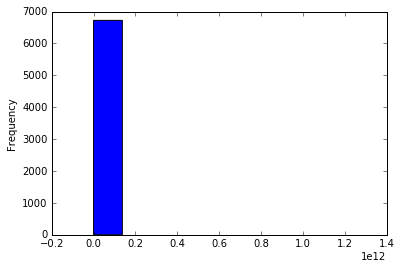

In [397]:
movie_df['revenue'].plot.hist()

In [428]:
temp = movie_df[movie_df['revenue']<10]
temp[temp['revenue']>0].shape

(4084, 31)

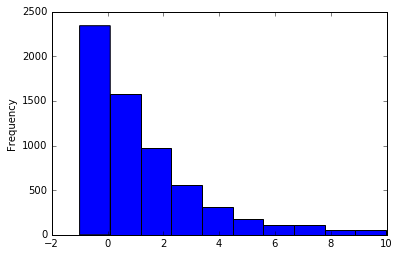

In [408]:
temp['revenue'].plot.hist()

In [414]:
temp['revenue'].min()

-0.99999999999566525

/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


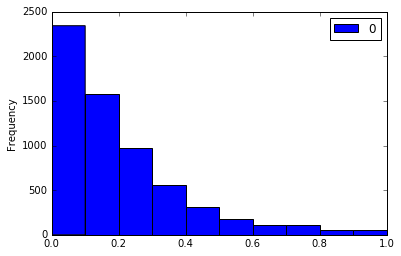

In [419]:
# revenue
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(temp['revenue'])
pd.DataFrame(X_train_minmax).plot.hist()

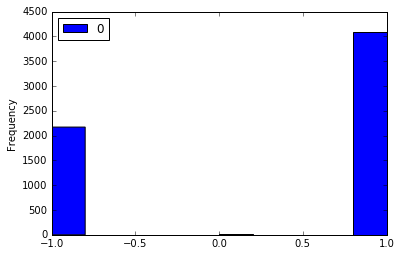

In [422]:
normalizer = preprocessing.Normalizer()
X_normalize = normalizer.fit_transform(temp['revenue'].reshape(-1, 1))
pd.DataFrame(X_normalize).plot.hist()

In [446]:
f = bom.bom_worldwide_revenue
print(bom[(bom.bom_budget!="") & (bom.bom_budget!="N/A") & (f!="")].shape)

(2530, 36)


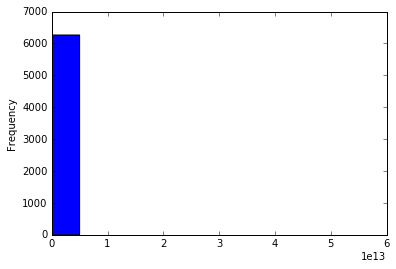

In [448]:
temp['budget'].plot.hist()

In [452]:
temp[temp['budget']>=1000000000]

,index,key_bom,key_wiki,key_omdb,title,year,budget,gross,revenue,release_date,release_month,release_quarter,release_day_of_the_year,release_week_of_the_year,holiday_season,runtime,mpaa_rating,actor_clean,director_clean,writer_clean,distributor_clean,composer_clean,cinematographer_clean,producer_clean,actor_score,director_score,writer_score,distributor_score,composer_score,cinematographer_score,producer_score
191,191,b306,w12766,o7432,a few good men,1992,3.340000e+09,2.432000e+08,-0.927186,1992-12-11 00:00:00,12,4,346,49,0,138,4,"['Tom Cruise', 'Jack Nicholson', 'Demi Moore', 'Kevin Bacon', 'Kiefer Sutherland', 'Kevin Pollak...",['Rob Reiner'],['Aaron Sorkin'],['Columbia'],['Marc Shaiman'],['Robert Richardson'],"['Rob Reiner', 'David Brown', 'Andrew Scheinman']",3090.676312,5800010.659964,6.372970,5801048.290533,5800042.579988,3540943.971341,11600062.804793
312,312,b708,w884,NaN,air force,1943,3.000000e+10,2.700000e+06,-0.999910,2043-02-03 00:00:00,2,1,34,5,0,124,6,"['John Ridgely', 'Gig Young', 'Arthur Kennedy', 'Charles Drake', 'Harry Carey', 'George Tobias',...",['Howard Hawks'],['Dudley Nichols'],['Warner Bros.'],['Franz Waxman'],['James Wong Howe'],"['Howard Hawks', 'Hal B. Wallis', 'Jack L. Warner ']",38.493016,9.360069,-0.639495,15505963.552973,52.225859,3.946968,15.507066
324,324,NaN,w965,NaN,alexander's ragtime band,NaN,1.200000e+13,3.600000e+06,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[''],[''],[''],[''],[''],[''],[''],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
501,501,b1246,w2257,o19968,atlantis: the lost empire,2001,9.012000e+10,1.861000e+08,-0.997935,2001-06-08 00:00:00,6,2,159,22,0,96,2,"['James Garner', 'Leonard Nimoy']","['Gary Trousdale', 'Kirk Wise']",['Joss Whedon'],['Buena Vista'],['James Newton Howard'],[''],['Don Hahn'],2526517.628443,-1.995870,11.051836,9337938.263981,1875528.649637,0.000000,9.114509
615,616,b1512,w3059,NaN,battleship,2012,2.092200e+11,3.030000e+08,-0.998552,2012-05-18 00:00:00,5,2,139,20,0,131,3,"['Jesse Plemons', 'Taylor Kitsch', 'Rihanna', 'Brooklyn Decker', 'Liam Neeson']",['Peter Berg'],"['Erich Hoeber', 'Jon Hoeber']",['Universal'],['Steve Jablonsky'],['Tobias A. Schliessler'],"['Peter Berg', 'Scott Stuber']",4098296.856930,4.672064,-0.470913,5289808.384345,11.220190,2.537324,30.855258
860,866,b2139,w5202,o20636,braveheart,1995,6.570000e+09,2.104000e+08,-0.967976,1995-05-24 00:00:00,5,2,144,21,1,178,4,"['Mel Gibson', 'Brendan Gleeson', 'Brian Cox']",['Mel Gibson'],['Randall Wallace'],['Paramount'],['James Horner'],['John Toll'],"['Mel Gibson', 'Alan Ladd', 'Jr.', 'Bruce Davey']",70.496570,23.822438,13.628955,10229619.047977,3295300.651964,12.714760,15.044900
877,883,b2190,w5347,NaN,bridge to terabithia (2007 film),2007,2.025000e+09,1.376000e+08,-0.932049,2007-02-16 00:00:00,2,1,47,6,1,95,2,"['Josh Hutcherson', 'AnnaSophia Robb', 'Zooey Deschanel', 'Robert Patrick']",[''],[''],['Buena Vista'],['Aaron Zigman'],['Michael Chapman'],['Alex Schwartz'],2616110.178893,0.000000,0.000000,9337938.263981,66.676751,59.026422,-0.348852
935,941,NaN,w5827,NaN,burning palms,NaN,5.000001e+13,3.271000e+06,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[''],[''],[''],[''],[''],[''],[''],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1007,1013,b2513,w6503,NaN,casino,1995,4.050000e+09,1.161000e+08,-0.971333,1995-11-22 00:00:00,11,4,326,47,1,178,4,"['Robert DeNiro', 'Sharon Stone']",['Martin Scorsese'],[''],['Universal'],[''],['Robert Richardson'],['Barbara De Fina'],4090584.666800,60.485436,0.000000,5289808.384345,0.000000,3540943.971341,0.956855
1547,1558,b3869,w11117,NaN,drop dead gorgeous,1999,1.015000e+09,1.050000e+07,-0.989655,1999-07-23 00:00:00,7,3,204,29,0,98,3,"['Amy Adams', 'Alexandra Holden', 'Kirsten Dunst', 'Ellen Barkin', 'Allison Janney', 'Denise Ric...",[''],[''],['New Line'],['Mark Mothersbaugh'],['Michael Spiller'],['Gavin Polone'],48403329.932856,0.000000,0.000000,238.709220,174.065701,-1.892279,4338992.715294


In [453]:
bom[bom['key_bom']=="b6513"]

,bom_title,bom_link,key_bom,bom_date,bom_year,bom_name,bom_budget,bom_domestic_gross,bom_lifetime_gross,bom_release_date,bom_runtime,bom_distributor,bom_genre,bom_rating,bom_awards,bom_actor,bom_assoc_producer,bom_cinematographer,bom_composer,bom_director,bom_exec_producer,bom_line_producer,bom_players,bom_producer,bom_writer,bom_close_date,bom_domestic_summary,bom_in_release,bom_limited_opening_weekend,bom_opening_weekend,bom_wide_opening_weekend,bom_widest_release,bom_domestic_revenue,bom_foreign_revenue,bom_worldwide_revenue,bom_total_lifetime_gross
6513,jack the giant slayer,http://www.boxofficemojo.com/movies/?id=jackthegiantkiller.htm,b6513,1-Mar-13,2013\r,Jack the Giant Slayer,$195 million,65187603,,1-Mar-13,1 hrs. 54 min.,Warner Bros. (New Line),Adventure,PG-13,No Academy Awards Information\r,"""['Ewen Bremner', 'Warwick Davis', 'Nicholas Hoult', 'Eleanor Tomlinson', 'Ewan McGregor', 'Stan...",,,['John Ottman'],['Bryan Singer'],,,,"""['Jon Jashni', 'Neal H. Moritz']""","""['Darren Lemke', 'Christopher McQuarrie']""\r",""" June 13, 2013""",,105 days / 15 weeks,,"""$27,202,226 """,,""" 3,525 theaters""\r","""$65,187,603 ""","""$132,500,000 ""","""$197,687,603 """,\r
